In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas_profiling
import folium
from folium import plugins

In [4]:
orders = pd.read_csv("orders.csv")
orders.shape

(3421083, 6)

In [3]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


In [13]:
orders["order_hour_of_day"].min()

0

In [11]:
Heatmap=pd.DataFrame()
a=[]
for i in range(7):
    aa=len(orders[orders["order_dow"]==i])
    a.append(aa)
Heatmap["order_dow"]=a
Heatmap

,order_dow
0,600905
1,587478
2,467260
3,436972
4,426339
5,453368
6,448761


In [16]:
orders[orders["order_hour_of_day"]==0]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
75,600894,8,1,6,0,NaN
77,2570360,8,3,5,0,30.0
568,725451,38,11,0,0,9.0
803,1321441,54,21,4,0,1.0
809,2916715,54,27,3,0,3.0
...,...,...,...,...,...,...
3420849,1571959,206200,11,5,0,4.0
3420855,971258,206200,17,1,0,14.0
3420901,2097072,206202,6,1,0,7.0
3420915,1764570,206202,20,4,0,11.0


In [20]:
cols=[]
for j in range(24):
    col="hour_%d"%j
    cols.append(col)
    data=orders[orders["order_hour_of_day"]==j]
    b=[]
    for i in range(7):
        bb=len(data[data["order_dow"]==i])
        b.append(bb)
    Heatmap[col]=b
        
Heatmap

,order_dow,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,600905,3936,2398,1409,963,813,1168,3329,12410,28108,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,587478,3674,1830,1105,748,809,1607,5370,16571,34116,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,467260,3059,1572,943,719,744,1399,4758,13245,24635,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,436972,2952,1495,953,654,719,1355,4562,12396,22553,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,426339,2642,1512,899,686,730,1330,4401,12493,21814,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,453368,3189,1672,1016,841,910,1574,4866,13434,24015,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,448761,3306,1919,1214,863,802,1136,3243,11319,22960,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


In [23]:
Heatmap.iloc[0].sum()/2

600905.0

In [28]:
Heatmap.loc[:, "hour_0":"hour_23"]

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


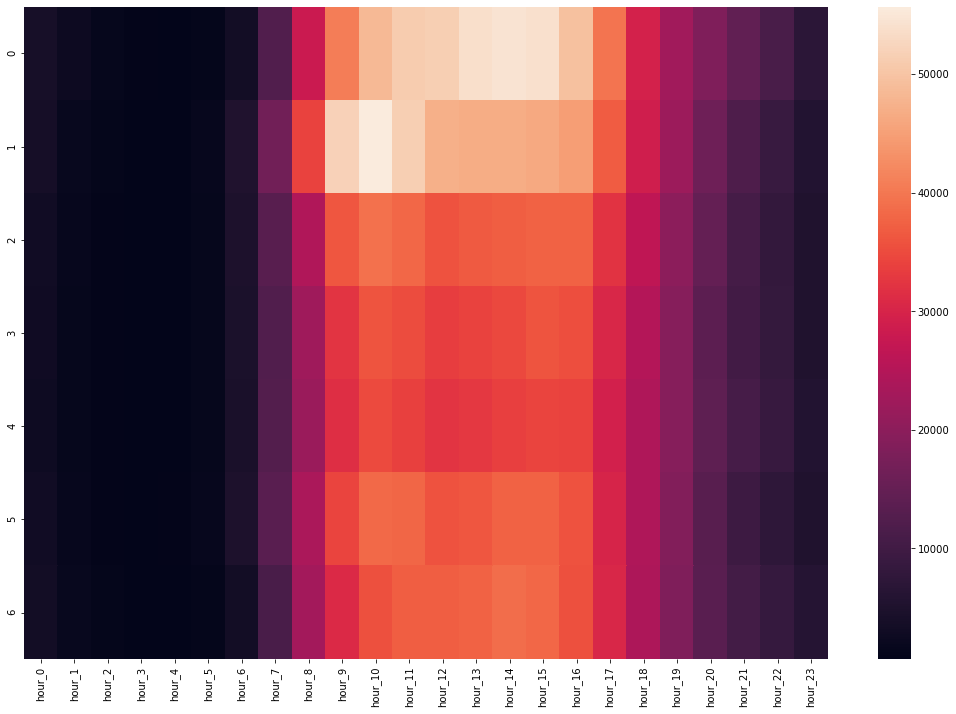

In [37]:
plt.figure(figsize=(18, 12))
sns.heatmap(Heatmap.loc[:, "hour_0":"hour_23"])
plt.show()